# Evaluation of MFCC

In [1]:
import numpy as np
import scipy.io.wavfile
import scipy.signal
import matplotlib.pyplot as plt
import seaborn as sns
from python_speech_features import mfcc
from fastdtw import fastdtw
%matplotlib inline

# Whole song

In [135]:
filename = 'flashcam'
sr, tutor = scipy.io.wavfile.read('../data/{}.wav'.format(filename))
sr, ba_learnt = scipy.io.wavfile.read('../data/{}_out.wav'.format(filename))

In [140]:
t_mf = mfcc(tutor, samplerate=sr, numcep=60, nfilt=80)

In [141]:
print(np.min(t_mf, axis=0))
print(np.max(t_mf, axis=0))
print(np.max(t_mf, axis=0) - np.min(t_mf, axis=0))

[ -36.04365339 -236.37866619 -271.95446193 -170.27693412 -125.8435816
  -90.97552364  -42.03491394  -39.62926609 -107.40008428 -115.22380277
 -107.86026043  -73.00603866  -17.11383675    0.          -11.50554764
  -61.6218881   -44.87689747  -52.94968817  -39.21638735  -22.29954372
    0.            0.           -3.23974399   -0.           -0.
   -3.03003584  -20.0050715   -63.34898764 -105.98215373 -100.32753183
  -74.54618364  -10.26455329   -0.           -0.          -13.6661489
  -54.35244132  -86.46691716  -73.07683429  -15.43047125   -0.           -0.
   -0.           -0.           -0.66642805    0.            0.            0.
   -1.12418934  -93.93144197 -214.72248571 -293.57598352 -317.13561175
 -266.44694212 -169.25061456  -90.70071763  -30.38169191  -21.96262767
  -22.0196908   -32.83530016  -56.03888926]
[ 23.12332656   0.           0.           0.           0.          19.44123133
  69.3104511   39.57992883   0.           0.          22.16776976
  16.85495566  59.49178285  

In [7]:
m_mf = mfcc(ba_learnt, samplerate=sr, numcep=8)

In [8]:
print(np.min(m_mf, axis=0))
print(np.max(m_mf, axis=0))
print(np.max(m_mf, axis=0) - np.min(t_mf, axis=0))

[ 16.94783971 -44.80298606 -90.13569943 -16.50856784 -19.11624125
 -18.00703058 -28.30046729 -18.81171886]
[  2.35064635e+01   8.47767160e+00  -3.20763172e-14   1.83551361e+01
   3.66928830e+01   8.45929634e+00   2.00347105e+01   1.89732858e+01]
[ 13.29572143  37.63906479  96.01472663  32.02811677  84.45620008
  60.64524741  47.05546689  68.34582001]


In [9]:
fastdtw(t_mf, m_mf)[0]

88.9393049001537

# Just syllable A

In [98]:
filename = 'ba_syllable_a'
sr1, tutor = scipy.io.wavfile.read('../data/{}.wav'.format(filename))
sr, ba_learnt = scipy.io.wavfile.read('../data/{}_out.wav'.format(filename))

In [99]:
t_mf = mfcc(tutor[750:], samplerate=sr1)[..., 1:]

In [100]:
print(np.min(t_mf, axis=0))
print(np.max(t_mf, axis=0))
print(np.max(t_mf, axis=0) - np.min(t_mf, axis=0))

[-11.53453015 -72.39064979  -3.99909132 -21.08215117 -10.24009678
  -2.38265866 -18.64872798  12.25171114   1.69680539  -1.60196102
  -2.63861569 -16.14768576]
[  2.68794853 -46.90747061   8.0472849   -5.37831068  -3.06540115
  10.45962144  -9.64333939  28.32340282  11.44603921   7.64683514
   7.76366954  -1.43321867]
[ 14.22247867  25.48317918  12.04637622  15.70384049   7.17469562
  12.8422801    9.00538859  16.07169168   9.74923382   9.24879616
  10.40228522  14.71446709]


In [101]:
m_mf = mfcc(ba_learnt[750:], samplerate=sr)[..., 1:]

In [102]:
m_mf

array([[ -5.10852673e+00,  -4.92221656e+01,  -4.40905516e+00,
          2.44195715e+01,  -1.16901864e+01,  -3.90784901e+00,
          3.23748807e+00,   8.10361549e-03,  -9.56724517e-01,
         -3.20021401e+00,   2.46508204e+00,   5.88144675e+00],
       [ -1.40503317e+01,  -5.49802141e+01,  -1.05671057e+01,
          1.40240727e+01,  -7.83528578e+00,  -7.40811685e+00,
          5.67982387e-01,  -4.84264216e+00,  -1.21444553e+01,
         -1.23409692e+01,  -4.42972477e+00,   1.70143403e+00]])

In [103]:
fastdtw(m_mf, t_mf)

(1.4389270855886342, [(0, 0), (0, 1), (1, 2)])

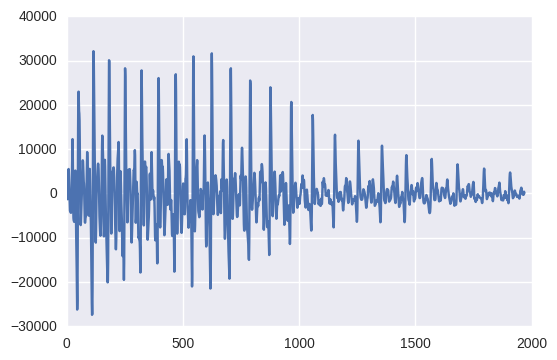

In [104]:

plt.plot(tutor[750:])

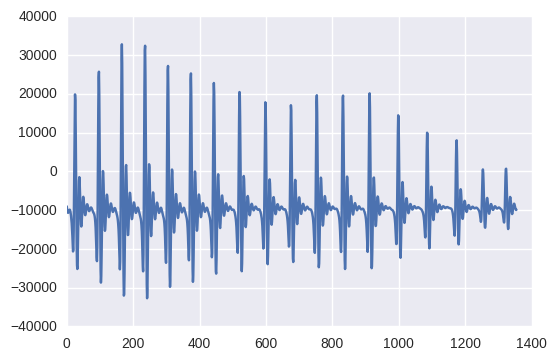

In [105]:
plt.plot(ba_learnt[750:])

In [115]:
# https://gist.github.com/endolith/255291
from scipy.signal import blackmanharris, fftconvolve
from numpy.fft import rfft

def parabolic(f, x):
    """Quadratic interpolation for estimating the true position of an
    inter-sample maximum when nearby samples are known.
   
    f is a vector and x is an index for that vector.
   
    Returns (vx, vy), the coordinates of the vertex of a parabola that goes
    through point x and its two neighbors.
   
    Example:
    Defining a vector f with a local maximum at index 3 (= 6), find local
    maximum if points 2, 3, and 4 actually defined a parabola.
   
    In [3]: f = [2, 3, 1, 6, 4, 2, 3, 1]
   
    In [4]: parabolic(f, argmax(f))
    Out[4]: (3.2142857142857144, 6.1607142857142856)
   
    """
    xv = 1/2. * (f[x-1] - f[x+1]) / (f[x-1] - 2 * f[x] + f[x+1]) + x
    yv = f[x] - 1/4. * (f[x-1] - f[x+1]) * (xv - x)
    return (xv, yv)


def freq_from_fft(sig, fs):
    """
    Estimate frequency from peak of FFT
    """
    # Compute Fourier transform of windowed signal
    windowed = sig * blackmanharris(len(sig))
    f = rfft(windowed)

    # Find the peak and interpolate to get a more accurate peak
    i = np.argmax(np.abs(f))  # Just use this for less-accurate, naive version
    true_i = parabolic(np.log(np.abs(f)), i)[0]

    # Convert to equivalent frequency
    return fs * true_i / len(windowed)

print(freq_from_fft(tutor[750:], sr))
print(freq_from_fft(ba_learnt[750:], sr))


1020.41538499
15.4321292184


## With noisy signal

In [33]:
noisy_t = np.random.normal(0, 10, len(tutor)) + tutor

In [64]:
snt = np.concatenate((np.zeros(200), tutor))

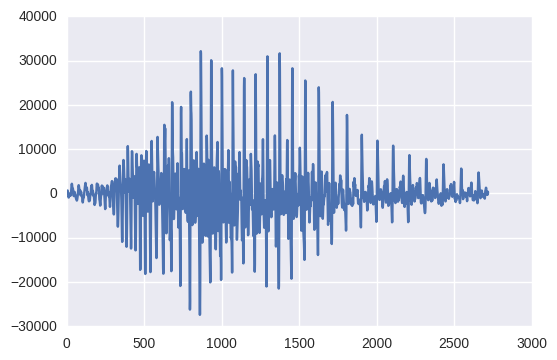

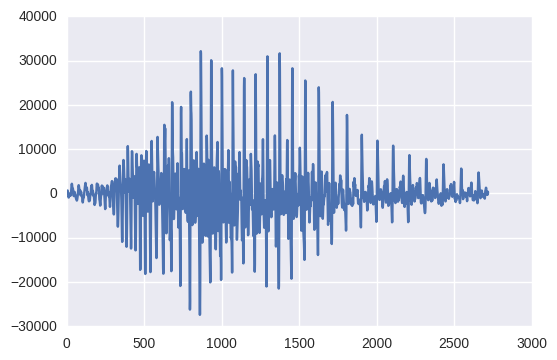

In [72]:
plt.plot(snt)
plt.show()
plt.plot(tutor)
plt.show()

In [66]:
nt_mf = mfcc(noisy_t, samplerate=sr1)[..., 1:]
snt_mf = mfcc(snt, samplerate=sr1)[..., 1:]

In [73]:
np.linalg.norm(t_mf - snt_mf, ord=2)

0.0

In [74]:
fastdtw(t_mf, snt_mf, dist=2, radius=10)

(0.0, [(0, 0), (1, 1), (2, 2), (3, 3), (4, 4)])

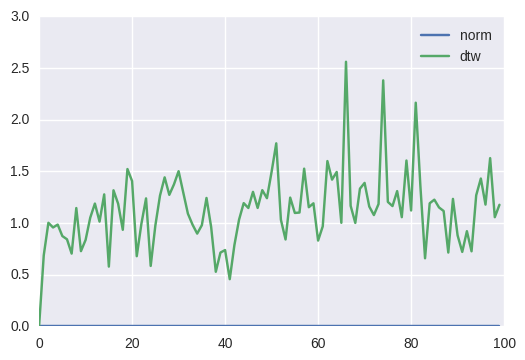

In [82]:
res = np.zeros((100, 2))
for i in range(100):
    snt = np.concatenate((np.zeros(i), tutor))
    snt_mf = mfcc(snt, samplerate=sr1)[..., 1:]
    #res[i, 0] = np.linalg.norm(t_mf[:min(len(t_mf), len(snt_mf))] - snt_mf[:min(len(t_mf), len(snt_mf))], ord=2)
    res[i, 1] = fastdtw(t_mf, snt_mf, radius=10)[0]
plt.plot(res[:, 0], label='norm')
plt.plot(res[:, 1], label='dtw')
plt.legend()

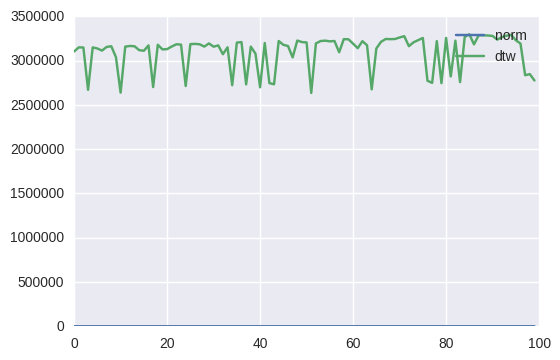

In [44]:
res = np.zeros((100, 2))
for i in range(100):
    snt = np.random.normal(0, i+1, len(tutor)) + tutor
    snt_mf = mfcc(snt, samplerate=sr1)[..., 1:]
    res[i, 0] = np.linalg.norm(t_mf[:min(len(t_mf), len(snt_mf))] - snt_mf[:min(len(t_mf), len(snt_mf))], ord=2)
    res[i, 1] = fastdtw(snt, tutor)[0]
plt.plot(res[:, 0], label='norm')
plt.plot(res[:, 1], label='dtw')
plt.legend()

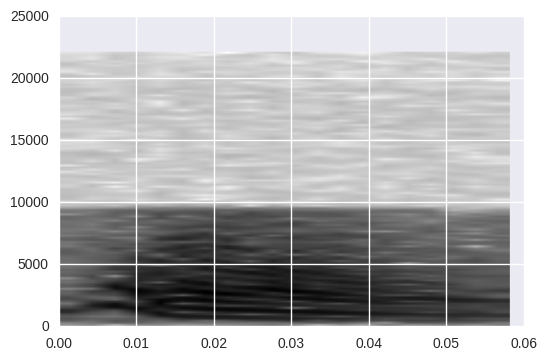

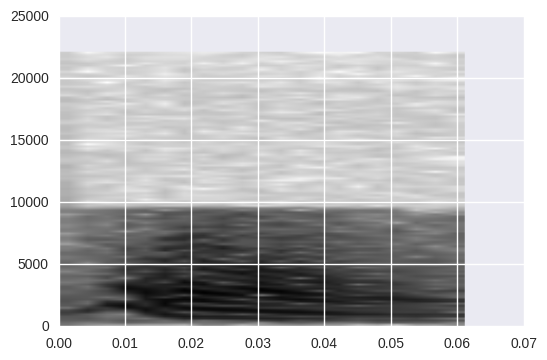

In [253]:
plt.specgram(tutor, Fs=sr)
plt.show()
plt.specgram(snt, Fs=sr)
plt.show()